In [23]:
# 한글 설정
import matplotlib.pyplot as plt

print(plt.rcParams['font.family'])
plt.rcParams['font.family'] = 'Malgun Gothic'

['Malgun Gothic']


In [24]:
#Step 1. 분석할 데이터가 저장된 파일을 불러와서 변수에 할당
#from google.colab import files
#myfile = files.upload()

import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
patients = pd.read_csv('임시_환자정보.csv', sep=",",header=0, encoding='cp949')
patients

,신장(cm),나이(세),질병 및 장애(급),수면시간(시간),체지방률(%),훈련횟수,훈련전측정개수,훈련후측정개수,측정개수변화량,균형활성도
0,118,63,0,0,21,29,40,15,62.67,1
1,139,31,1,4,12,9,38,10,75.00,1
2,163,58,3,6,7,49,44,20,54.67,2
3,169,26,2,1,9,28,42,15,65.33,1
4,192,8,2,0,5,49,41,18,56.33,1
...,...,...,...,...,...,...,...,...,...,...
303,146,61,1,1,5,14,40,10,74.50,1
304,148,27,1,6,33,18,39,12,68.50,2
305,136,34,0,0,29,24,41,16,61.17,1
306,194,28,1,8,14,42,44,21,52.17,2


C:\Users\임유리\AppData\Local\Temp\ipykernel_9804\367508052.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rD" (-> marker='D'). The keyword argument will take precedence.
  plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], "rD", \


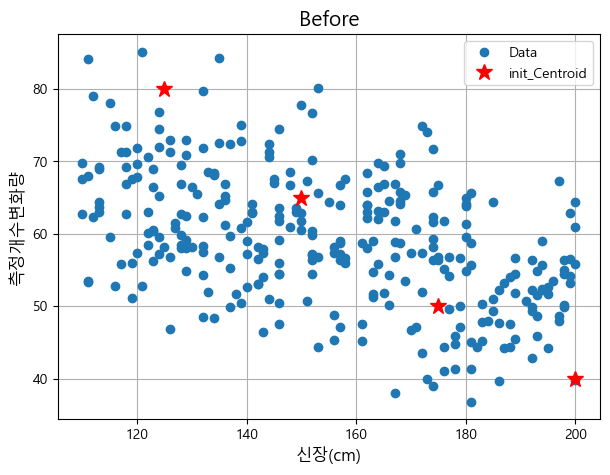

In [33]:
#Step 2. 데이터의 분포를 그림으로 그리고 임의의 중심점 지정
import matplotlib.pyplot as plt
x1, y1 = 200, 40
x2, y2 = 175, 50
x3, y3 = 150, 65
x4, y4 = 125, 80

data = patients[['신장(cm)', '측정개수변화량']]
plt.figure(figsize=(7, 5))
plt.title("Before", fontsize=15)
plt.plot(data["신장(cm)"], data["측정개수변화량"], "o", label="Data")
plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], "rD", \
         marker='*', markersize=12, label="init_Centroid")
plt.xlabel("신장(cm)", fontsize=12)
plt.ylabel("측정개수변화량", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [36]:
#Step 3. 군집 분석 수행
from sklearn.cluster import KMeans
import numpy as np
data = patients[["신장(cm)", "측정개수변화량"]]

# 초기의 점을 지정한 경우
kmeans = KMeans(n_clusters=4, init=np.array([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]))

# 초기의 점을 지정하지 않은 경우
#kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
data['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

c:\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
c:\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\임유리\AppData\Local\Temp\ipykernel_9804\4022018528.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [37]:
data

,신장(cm),측정개수변화량,cluster
0,118,62.67,3
1,139,75.00,2
2,163,54.67,1
3,169,65.33,1
4,192,56.33,0
...,...,...,...
303,146,74.50,2
304,148,68.50,2
305,136,61.17,2
306,194,52.17,0


C:\Users\임유리\AppData\Local\Temp\ipykernel_9804\1426744765.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rD" (-> marker='D'). The keyword argument will take precedence.
  plt.plot(final_centroid[:, 0], final_centroid[:, 1], "rD", \


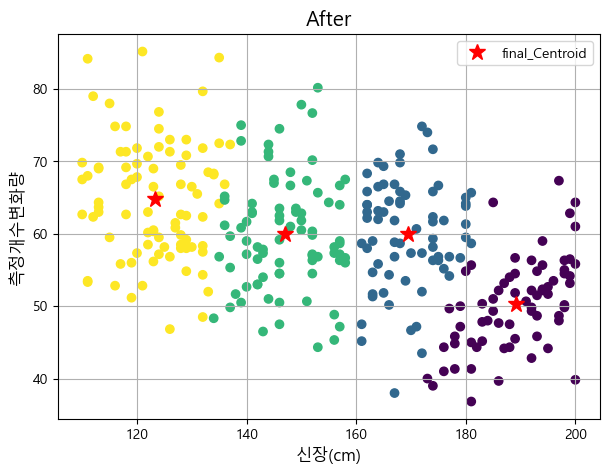

In [39]:
#Step 4. 군집화를 진행하여 최종 결과를 확인
plt.figure(figsize=(7, 5))
plt.title("After", fontsize=15)
plt.scatter(data["신장(cm)"], data["측정개수변화량"], c=data['cluster'])
plt.plot(final_centroid[:, 0], final_centroid[:, 1], "rD", \
         marker='*', markersize=12, label="final_Centroid")
plt.xlabel("신장(cm)", fontsize=12)
plt.ylabel("측정개수변화량", fontsize=12)
plt.legend()
plt.grid()
plt.show()